In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
import datetime
import matplotlib.dates as mdates
%matplotlib inline
import pickle

https://healthdata.gov/State/New-York-Forward-COVID-19-Daily-Hospitalization-Su/wpws-vkh9

In [2]:
df_hhs = pd.read_csv('https://health.data.ny.gov/api/views/qutr-irdf/rows.csv?accessType=DOWNLOAD', parse_dates = ['As of Date'])

In [3]:
df_hhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7590 entries, 0 to 7589
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   As of Date                   7590 non-null   datetime64[ns]
 1   Region                       7590 non-null   object        
 2   Total Patients Hospitalized  7590 non-null   int64         
 3   Total Patients in ICU        7590 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 237.3+ KB


In [4]:
df_hhs.head()


,As of Date,Region,Total Patients Hospitalized,Total Patients in ICU
0,2020-03-26,CAPITAL REGION,40,13
1,2020-03-26,CENTRAL NEW YORK,20,4
2,2020-03-26,FINGER LAKES,39,23
3,2020-03-26,LONG ISLAND,1082,303
4,2020-03-26,MID-HUDSON,493,126


In [5]:
df_hhs.tail(20)

,As of Date,Region,Total Patients Hospitalized,Total Patients in ICU
7570,2022-04-27,CAPITAL REGION,146,16
7571,2022-04-27,CENTRAL NEW YORK,139,15
7572,2022-04-27,FINGER LAKES,325,27
7573,2022-04-27,LONG ISLAND,211,25
7574,2022-04-27,MID-HUDSON,148,17
7575,2022-04-27,MOHAWK VALLEY,51,4
7576,2022-04-27,NEW YORK CITY,459,57
7577,2022-04-27,NORTH COUNTRY,46,5
7578,2022-04-27,SOUTHERN TIER,108,13
7579,2022-04-27,WESTERN NEW YORK,148,11


In [6]:
df_hhs[df_hhs.Region =='NEW YORK CITY']

,As of Date,Region,Total Patients Hospitalized,Total Patients in ICU
6,2020-03-26,NEW YORK CITY,4733,1084
16,2020-03-27,NEW YORK CITY,5256,1175
26,2020-03-28,NEW YORK CITY,6002,1337
36,2020-03-29,NEW YORK CITY,6631,1520
46,2020-03-30,NEW YORK CITY,7630,1724
...,...,...,...,...
7546,2022-04-24,NEW YORK CITY,418,64
7556,2022-04-25,NEW YORK CITY,447,62
7566,2022-04-26,NEW YORK CITY,439,56
7576,2022-04-27,NEW YORK CITY,459,57


In [7]:
df_dt = df_hhs.set_index('As of Date')

In [8]:
df_nyc_dt = df_dt[df_dt.Region == 'NEW YORK CITY']

In [9]:
df_nyc_dt

,Region,Total Patients Hospitalized,Total Patients in ICU
As of Date,,,
2020-03-26,NEW YORK CITY,4733,1084
2020-03-27,NEW YORK CITY,5256,1175
2020-03-28,NEW YORK CITY,6002,1337
2020-03-29,NEW YORK CITY,6631,1520
2020-03-30,NEW YORK CITY,7630,1724
...,...,...,...
2022-04-24,NEW YORK CITY,418,64
2022-04-25,NEW YORK CITY,447,62
2022-04-26,NEW YORK CITY,439,56


In [10]:
df_nyc_hosp = df_nyc_dt.loc[:,['Total Patients Hospitalized']]

In [11]:
df_nyc_hosp


,Total Patients Hospitalized
As of Date,
2020-03-26,4733
2020-03-27,5256
2020-03-28,6002
2020-03-29,6631
2020-03-30,7630
...,...
2022-04-24,418
2022-04-25,447
2022-04-26,439


In [12]:
df_nyc_hosp_7day_moving= df_nyc_hosp.rolling(7).mean().shift()

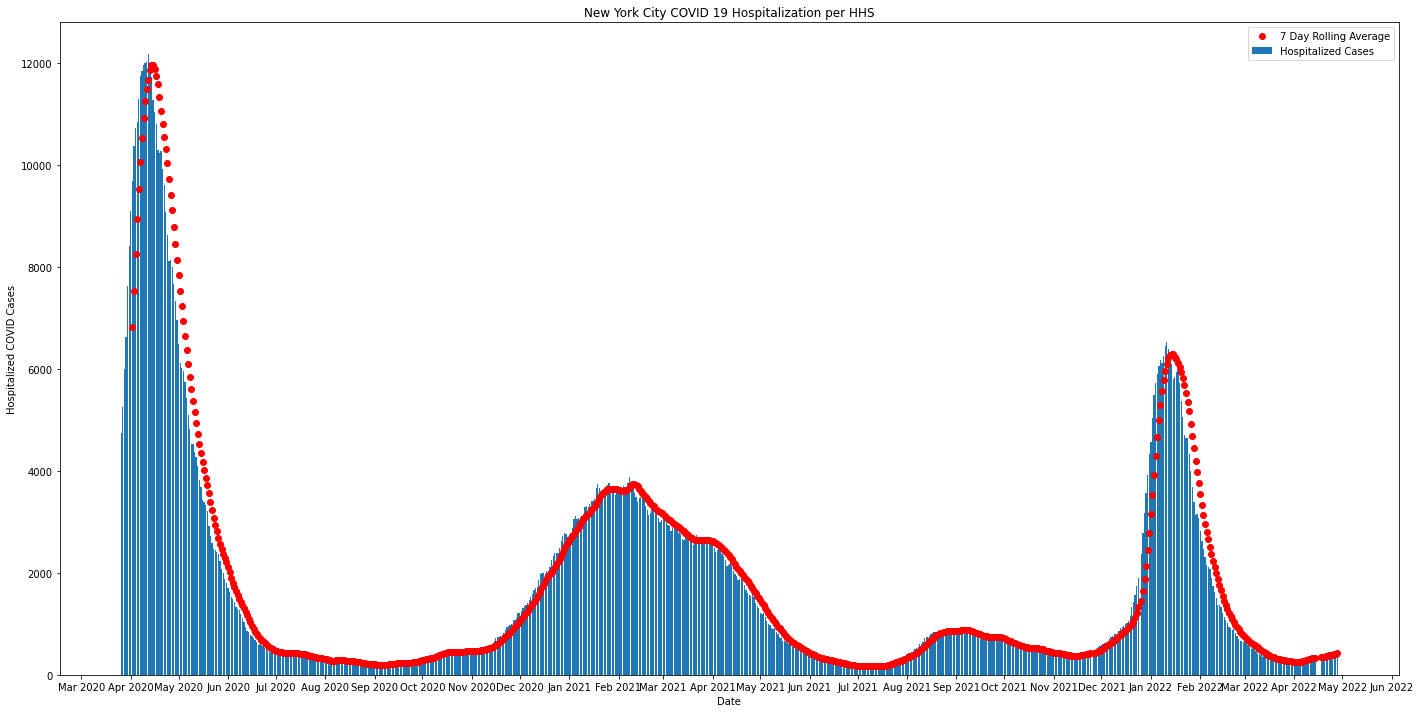

In [13]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(24,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('New York City COVID 19 Hospitalization per HHS')
plt.xlabel('Date',color='black')
plt.ylabel('Hospitalized COVID Cases',color='black')
plt.bar(df_nyc_hosp.index,df_nyc_hosp['Total Patients Hospitalized'])
plt.plot(df_nyc_hosp_7day_moving, 'ro')
plt.legend(['7 Day Rolling Average','Hospitalized Cases'])
fig.savefig('HHS_NYC_Hospitalized.png')

In [14]:
df_nyc_icu = df_nyc_dt.loc[:,['Total Patients in ICU']]

In [15]:
df_nyc_icu


,Total Patients in ICU
As of Date,
2020-03-26,1084
2020-03-27,1175
2020-03-28,1337
2020-03-29,1520
2020-03-30,1724
...,...
2022-04-24,64
2022-04-25,62
2022-04-26,56


In [16]:
df_nyc_icu_7day_moving= df_nyc_icu.rolling(7).mean().shift()

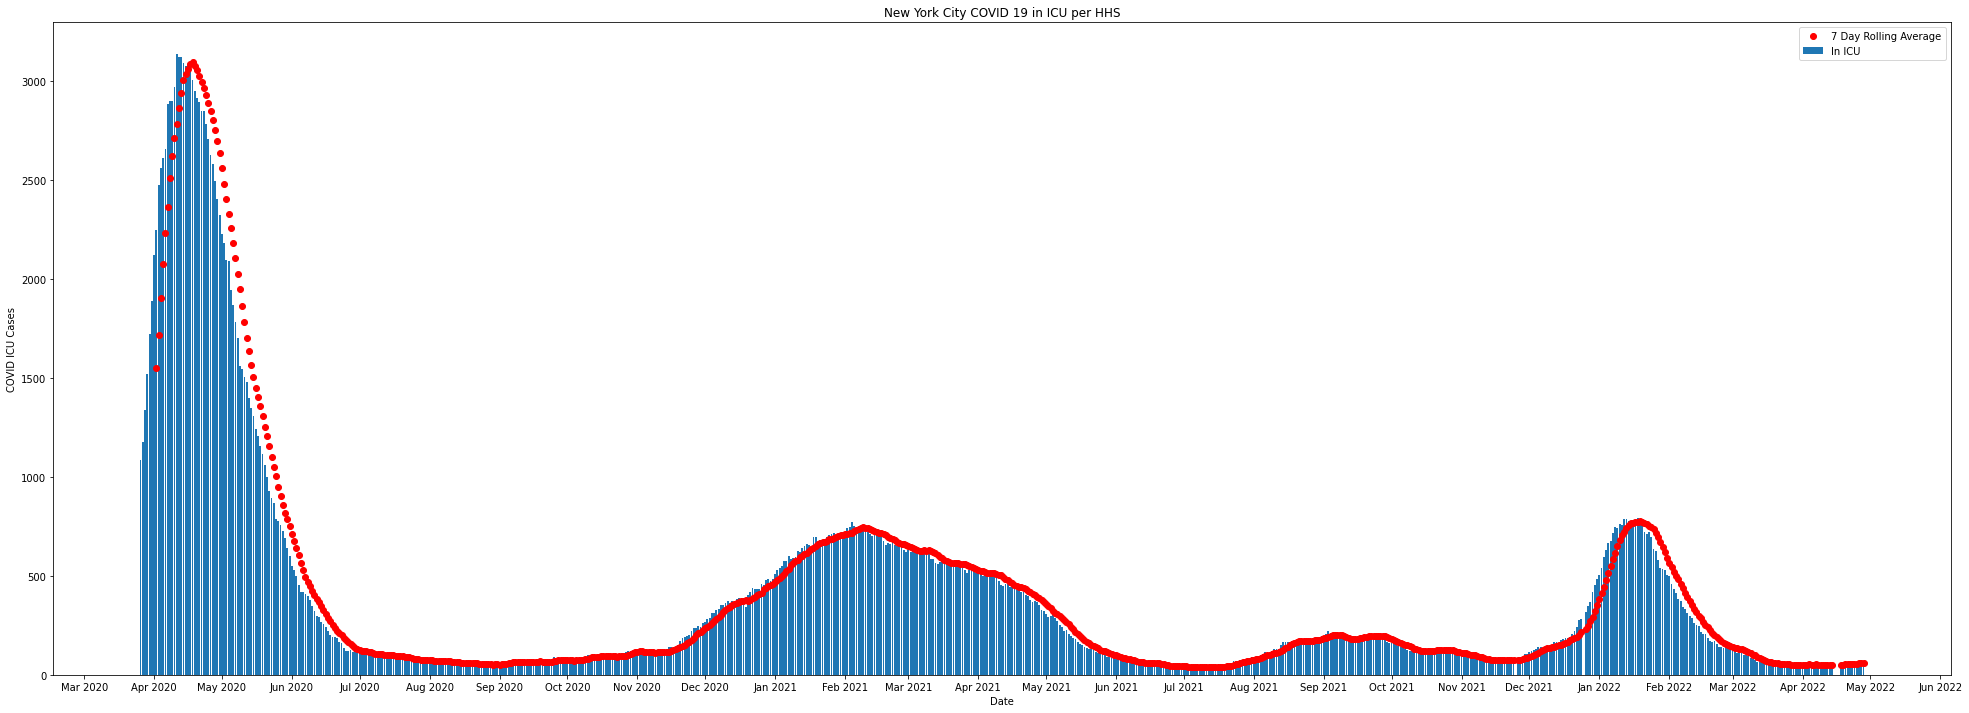

In [17]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(34,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('New York City COVID 19 in ICU per HHS')
plt.xlabel('Date',color='black')
plt.ylabel('COVID ICU Cases',color='black')
plt.bar(df_nyc_icu.index,df_nyc_icu['Total Patients in ICU'])
plt.plot(df_nyc_icu_7day_moving, 'ro')
plt.legend(['7 Day Rolling Average','In ICU'])
fig.savefig('HHS_NYC_ICU.png')